In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
media_sales = pd.read_csv("merged_media_conversion_spend&users.csv")

In [5]:
media_sales.head()

,dates,brand,total_users_reached,total_cost,sponsored_products_s,sponsored_products_u,sponsored_brands_s,sponsored_brands_u,video_s,video_u,OTT_s,OTT_u,sponsored_display_s,sponsored_display_u,display_s,display_u,sales,converted_users
0,2022-09-02,Brand C,1396015,22956.80920,0.00,0,0.0,0,550.65473,42781,16190.4053,347938,0.0,0,6215.74917,1005296,4509.52,1501
1,2022-09-02,Brand G,1721941,18708.77882,6656.23,2944,0.0,0,0.00000,0,3256.1643,128440,0.0,0,8796.38452,1590557,15706.65,1905
2,2022-09-02,Brand LA,531396,3424.46448,0.00,0,0.0,0,173.85862,17612,0.0000,0,0.0,0,3250.60586,513784,607.42,248
3,2022-09-02,Brand LO,4422994,39091.98919,20499.98,11060,0.0,0,0.00000,0,0.0000,0,0.0,0,18592.00919,4411934,45236.85,5464
4,2022-09-02,Brand M,1990735,27193.26779,16769.30,13675,0.0,0,0.00000,0,0.0000,0,0.0,0,10423.96779,1977060,21105.52,4357


In [6]:
all_brands = media_sales.groupby("dates").sum()
all_brands.head()
all_brands.to_csv("media_sales_all.csv", index = False)

# Descriptive Statistics 


### the distribution of spend and user reach of different channels for all brands and individual brands separately

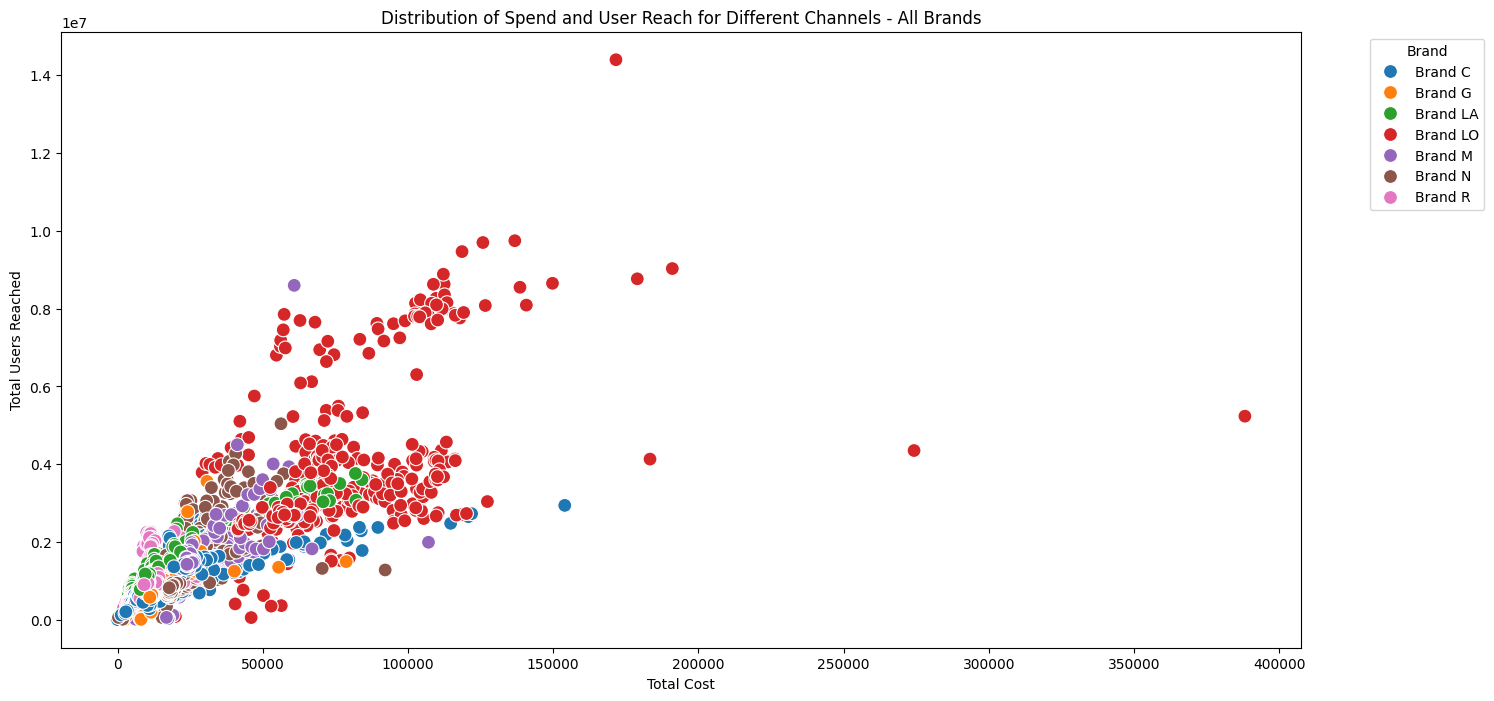

In [7]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='total_cost', y='total_users_reached', hue='brand', data=media_sales, s=100)
plt.title('Distribution of Spend and User Reach for Different Channels - All Brands')
plt.xlabel('Total Cost')
plt.ylabel('Total Users Reached')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

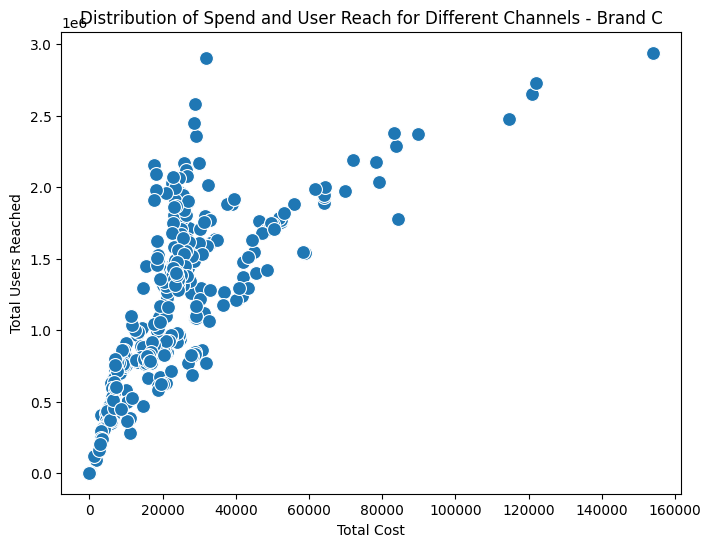

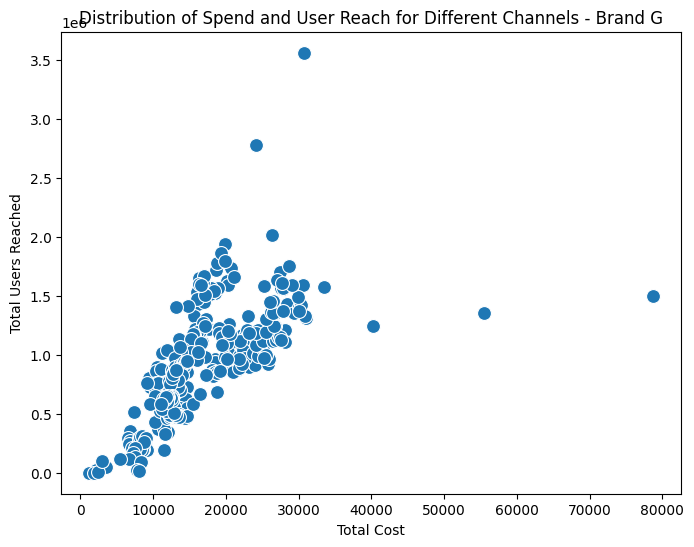

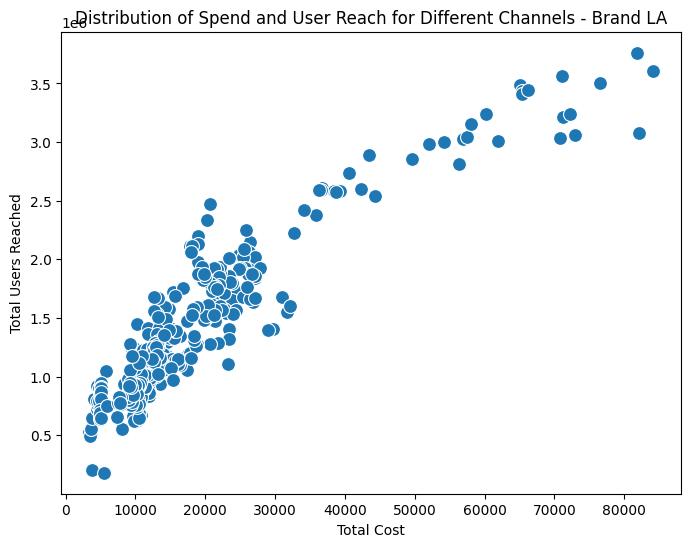

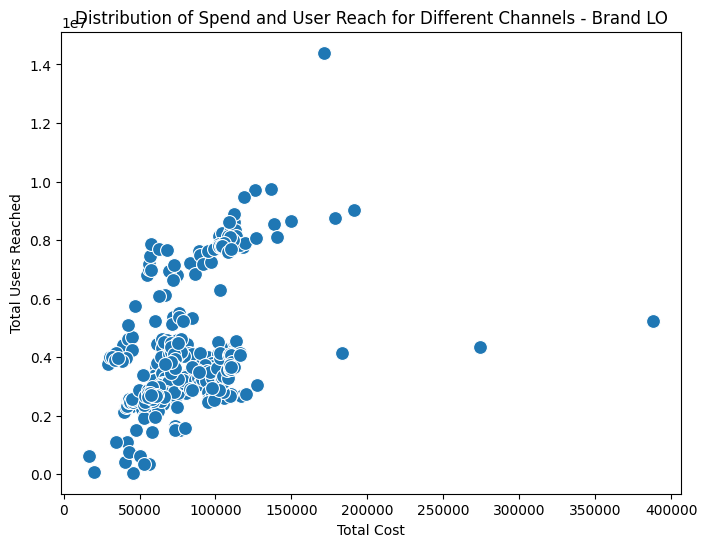

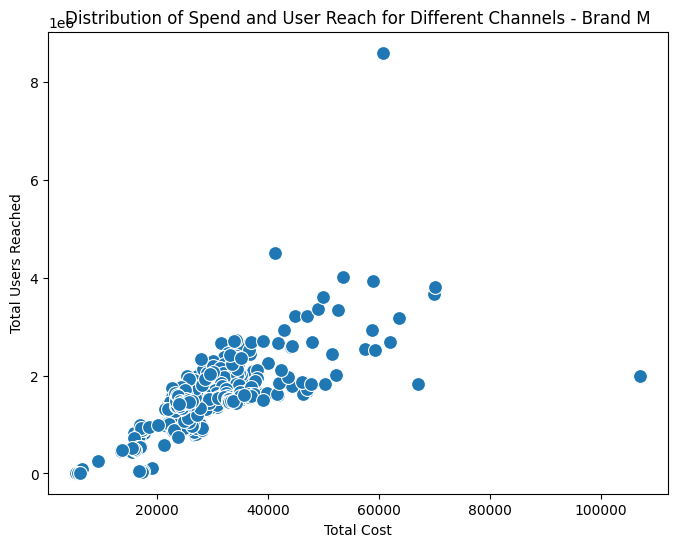

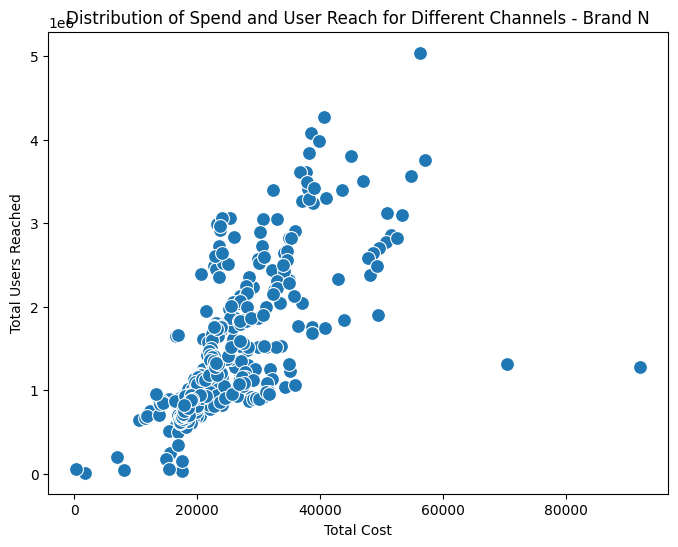

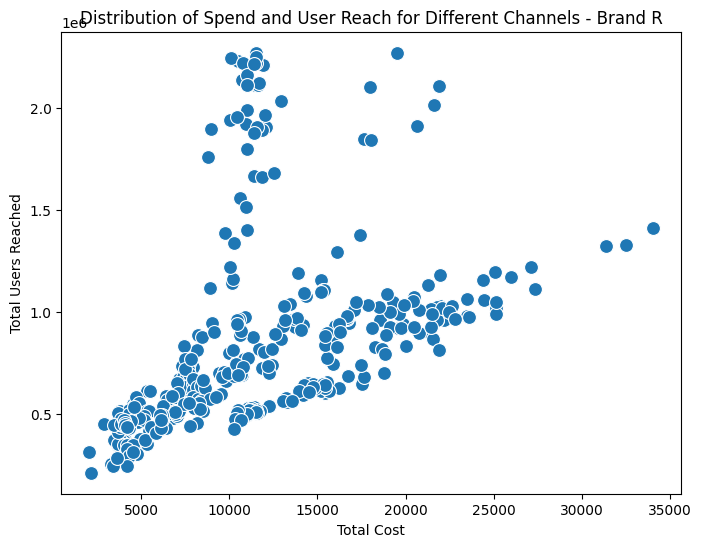

In [8]:
brands = media_sales['brand'].unique()

for brand in brands:
    brand_data = media_sales[media_sales['brand'] == brand]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='total_cost', y='total_users_reached', data=brand_data, s=100)
    plt.title(f'Distribution of Spend and User Reach for Different Channels - {brand}')
    plt.xlabel('Total Cost')
    plt.ylabel('Total Users Reached')
    plt.show()

### sales and user conversion for all brands and individual brands separately

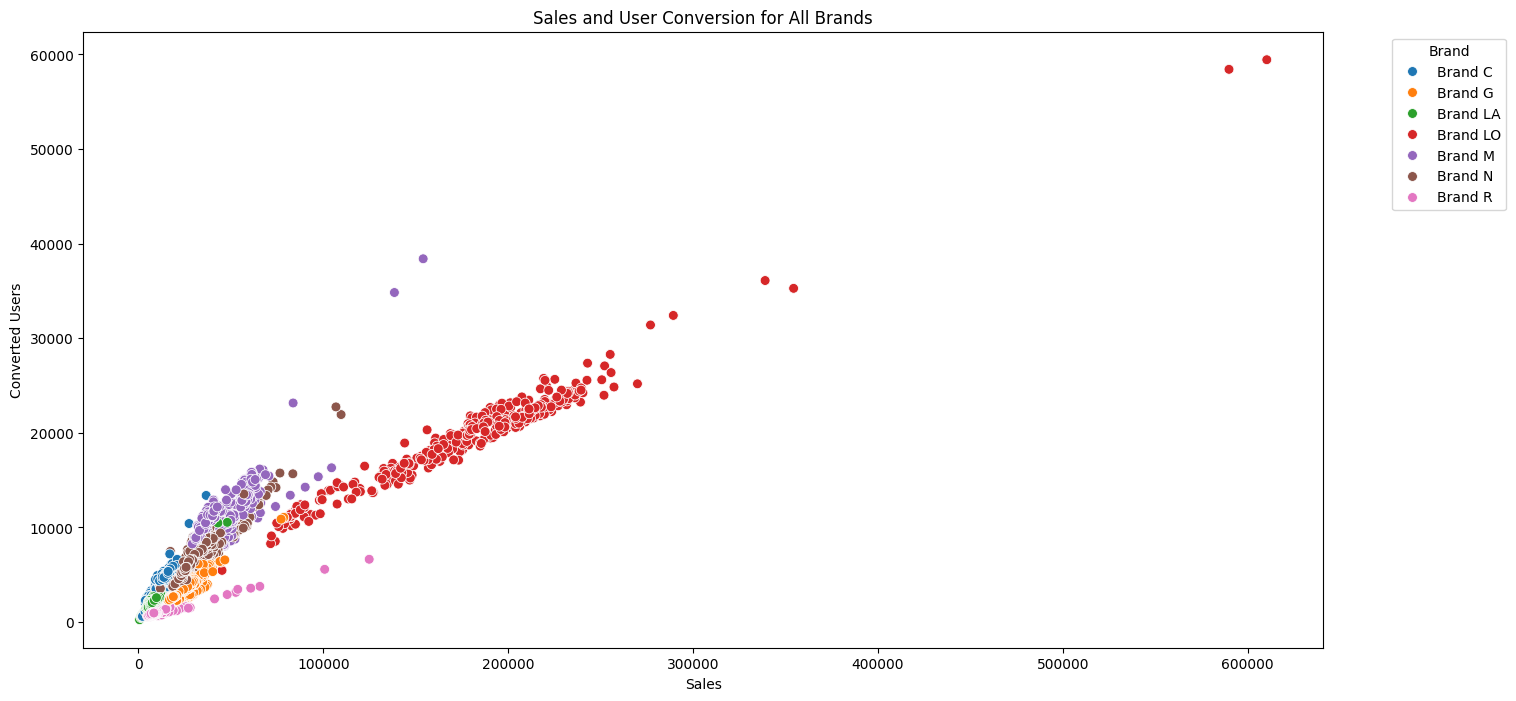

In [9]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='sales', y='converted_users', hue='brand', data=media_sales, s=50)
plt.title('Sales and User Conversion for All Brands')
plt.xlabel('Sales')
plt.ylabel('Converted Users')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

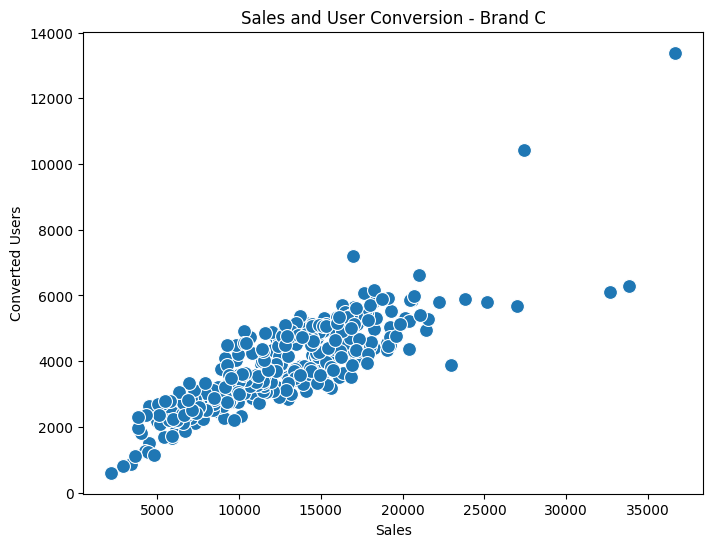

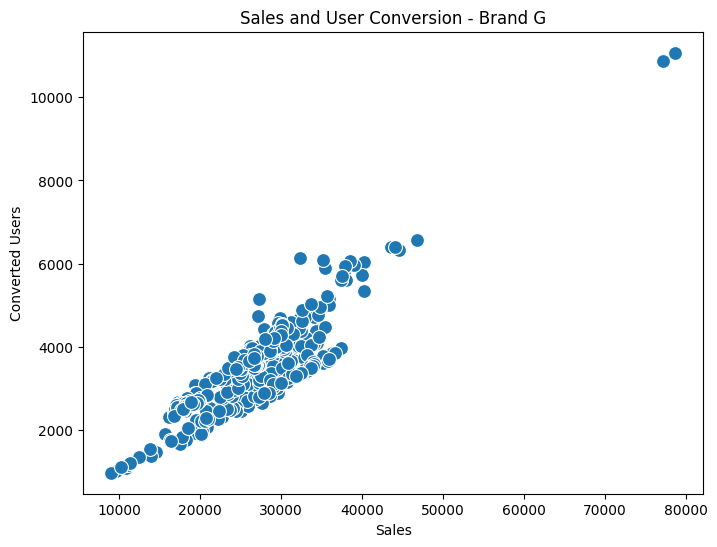

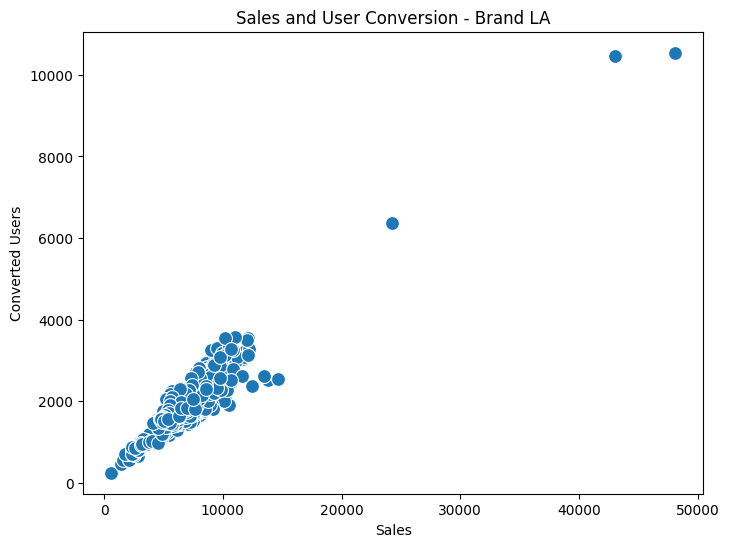

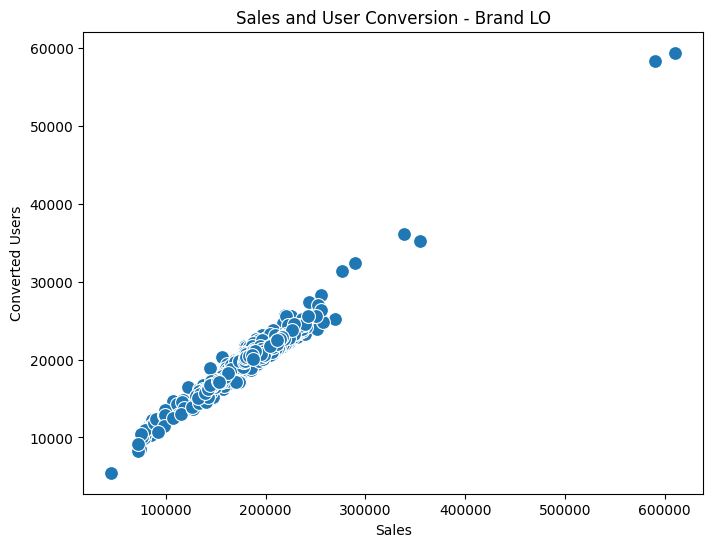

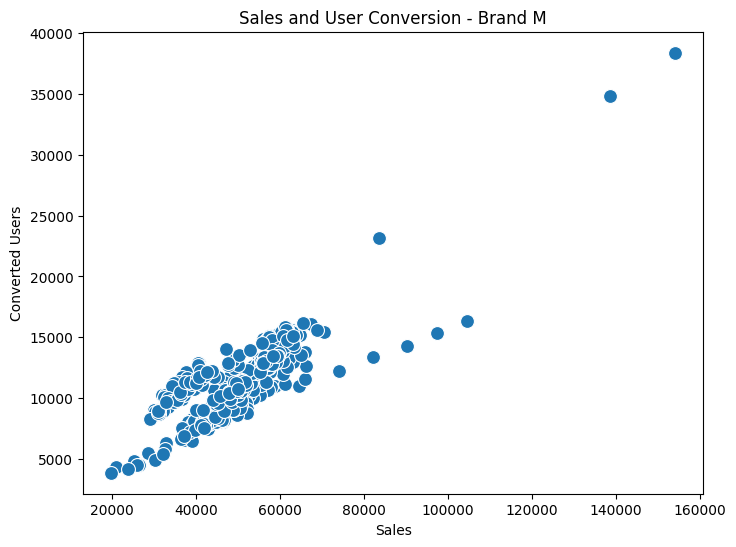

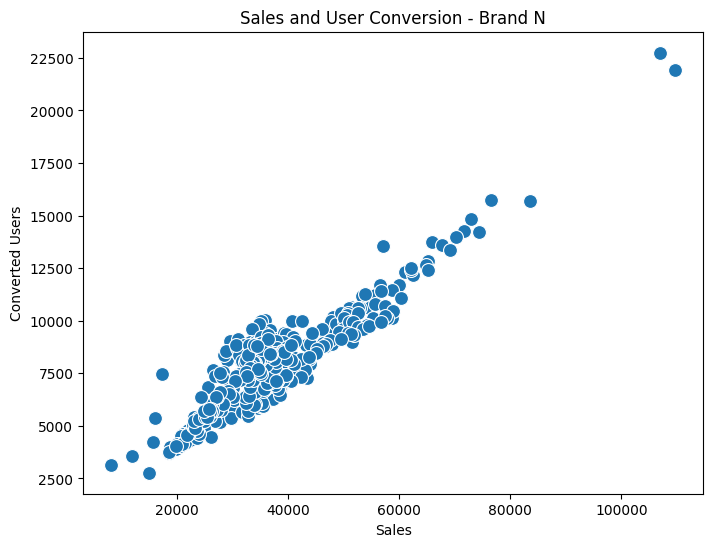

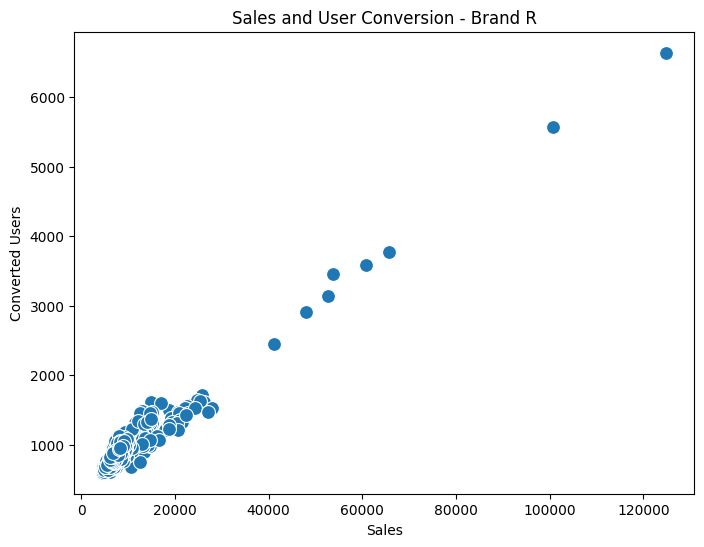

In [10]:
brands = media_sales['brand'].unique()

for brand in brands:
    brand_data = media_sales[media_sales['brand'] == brand]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sales', y='converted_users', data=brand_data, s=100)
    plt.title(f'Sales and User Conversion - {brand}')
    plt.xlabel('Sales')
    plt.ylabel('Converted Users')
    plt.show()

### the spend on each channel and sales over time for all brands combined and individual brands

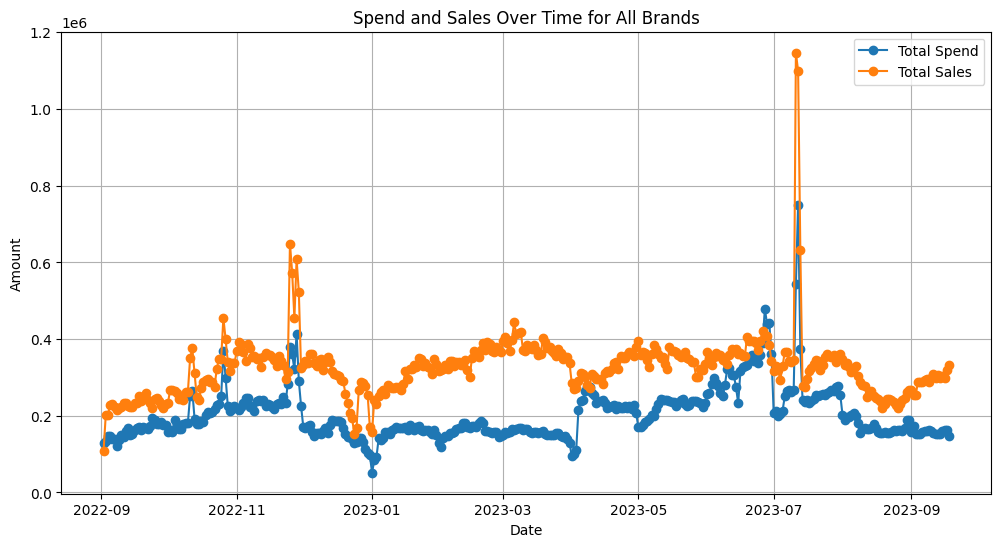

In [12]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

daily_summary = media_sales.groupby('dates').agg({
    'total_cost': 'sum',
    'sales': 'sum'
}).reset_index()

dates_array = daily_summary['dates'].to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(dates_array, daily_summary['total_cost'].to_numpy(), label='Total Spend', marker='o')
plt.plot(dates_array, daily_summary['sales'].to_numpy(), label='Total Sales', marker='o')

plt.title('Spend and Sales Over Time for All Brands')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

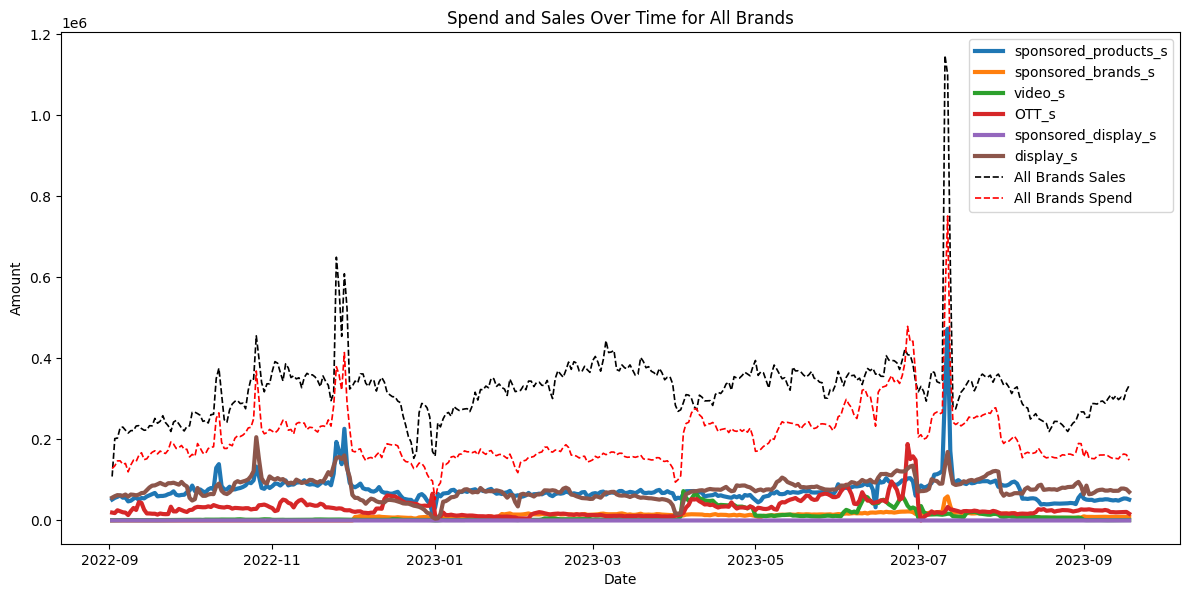

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'dates' column to datetime
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

# Group by dates and aggregate values
daily_summary = media_sales.groupby('dates').agg({
    'total_cost': 'sum',
    'sales': 'sum',
    'sponsored_products_s': 'sum',
    'sponsored_products_u': 'sum',
    'sponsored_brands_s': 'sum',
    'sponsored_brands_u': 'sum',
    'video_s': 'sum',
    'video_u': 'sum',
    'OTT_s': 'sum',
    'OTT_u': 'sum',
    'sponsored_display_s': 'sum',
    'sponsored_display_u': 'sum',
    'display_s': 'sum',
    'display_u': 'sum'
}).reset_index()

# Create a single y-axis for both spend and sales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Channels for spend
channels = ['sponsored_products_s', 'sponsored_brands_s',
            'video_s', 'OTT_s', 'sponsored_display_s',
            'display_s']

for i, channel in enumerate(channels):
    ax1.plot(dates_array, daily_summary[channel].to_numpy(), label=f'{channel}', linestyle='-',  color=f'C{i}', linewidth=3)

ax1.plot(dates_array, daily_summary['sales'].to_numpy(), label='All Brands Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(dates_array, daily_summary['total_cost'].to_numpy(), label='All Brands Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for All Brands')
plt.show()


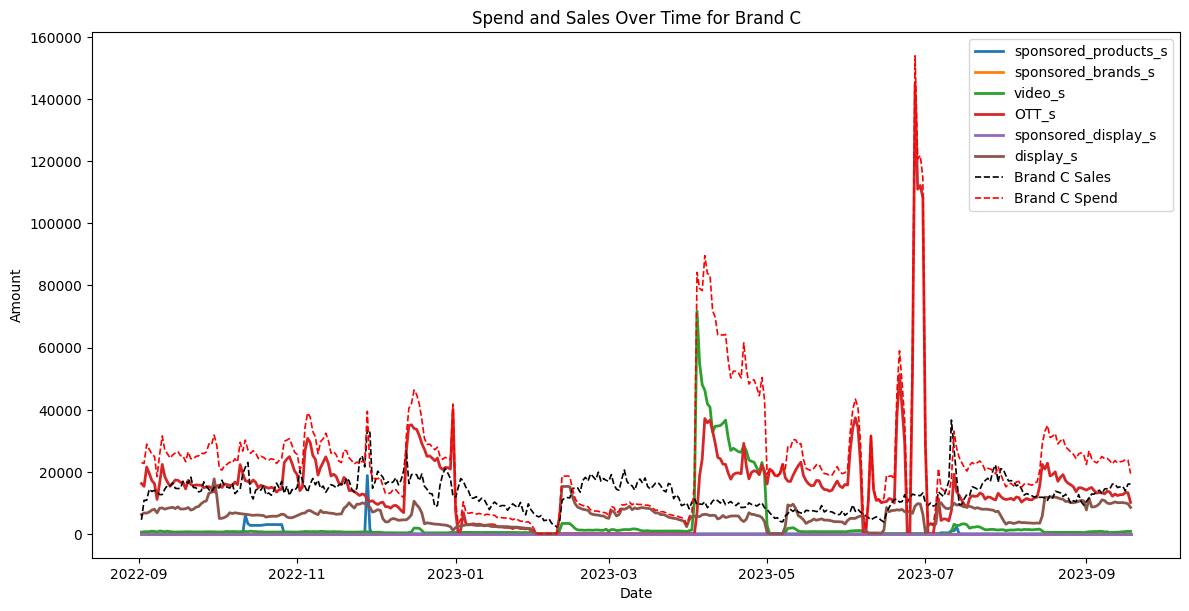

In [35]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_c_data = media_sales[media_sales['brand'] == 'Brand C']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_c_data['dates'].to_numpy(), brand_c_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_c_data['dates'].to_numpy(), brand_c_data['sales'].to_numpy(), label='Brand C Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_c_data['dates'].to_numpy(), brand_c_data['total_cost'].to_numpy(), label='Brand C Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand C')
plt.show()

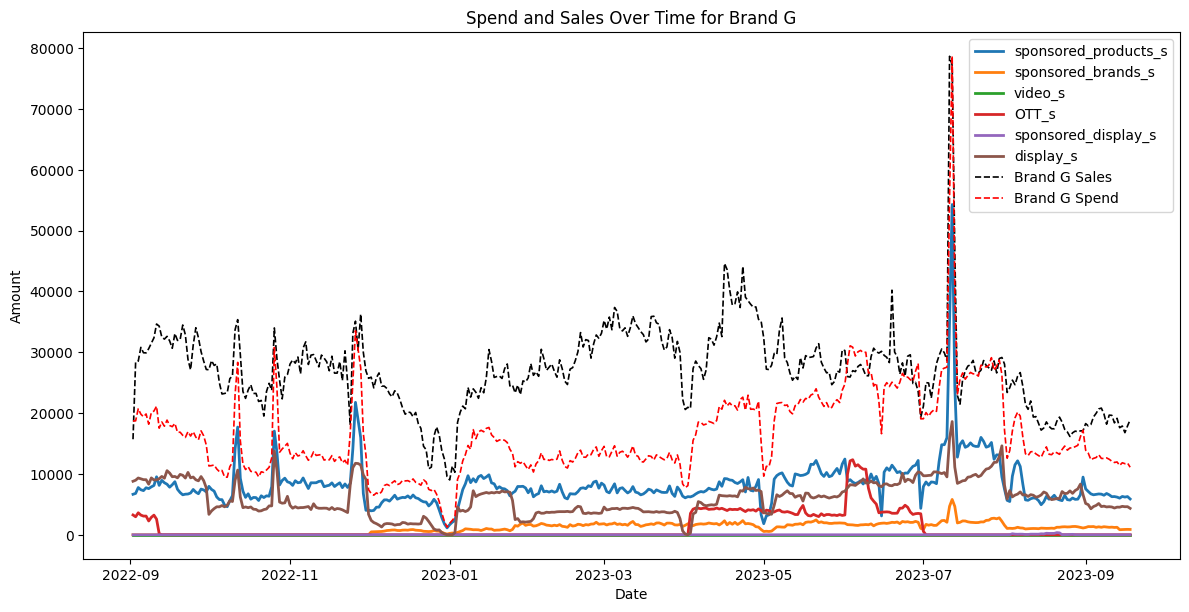

In [36]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_g_data = media_sales[media_sales['brand'] == 'Brand G']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_g_data['dates'].to_numpy(), brand_g_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_g_data['dates'].to_numpy(), brand_g_data['sales'].to_numpy(), label='Brand G Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_g_data['dates'].to_numpy(), brand_g_data['total_cost'].to_numpy(), label='Brand G Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand G')
plt.show()

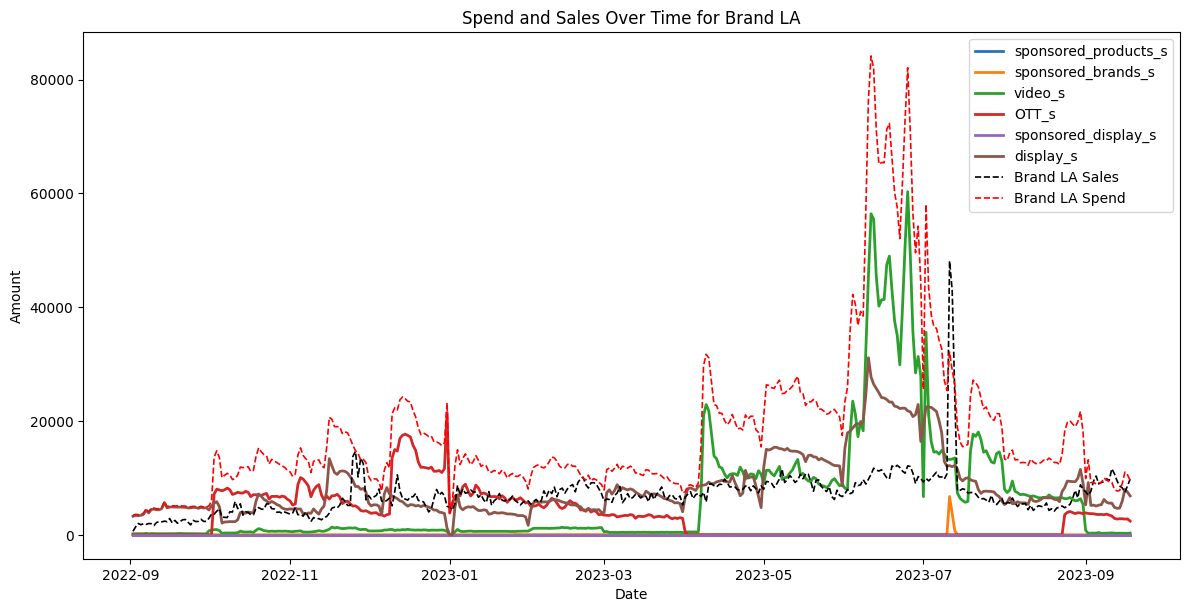

In [37]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_la_data = media_sales[media_sales['brand'] == 'Brand LA']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_la_data['dates'].to_numpy(), brand_la_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_la_data['dates'].to_numpy(), brand_la_data['sales'].to_numpy(), label='Brand LA Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_la_data['dates'].to_numpy(), brand_la_data['total_cost'].to_numpy(), label='Brand LA Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand LA')
plt.show()

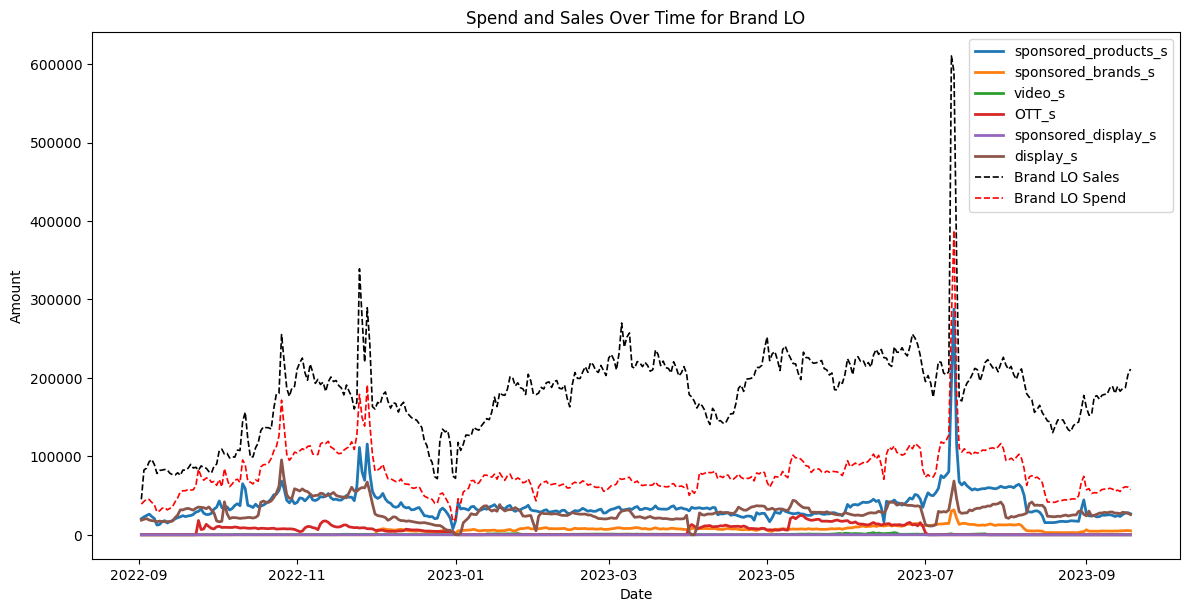

In [38]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_lo_data = media_sales[media_sales['brand'] == 'Brand LO']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_lo_data['dates'].to_numpy(), brand_lo_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_lo_data['dates'].to_numpy(), brand_lo_data['sales'].to_numpy(), label='Brand LO Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_lo_data['dates'].to_numpy(), brand_lo_data['total_cost'].to_numpy(), label='Brand LO Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand LO')
plt.show()

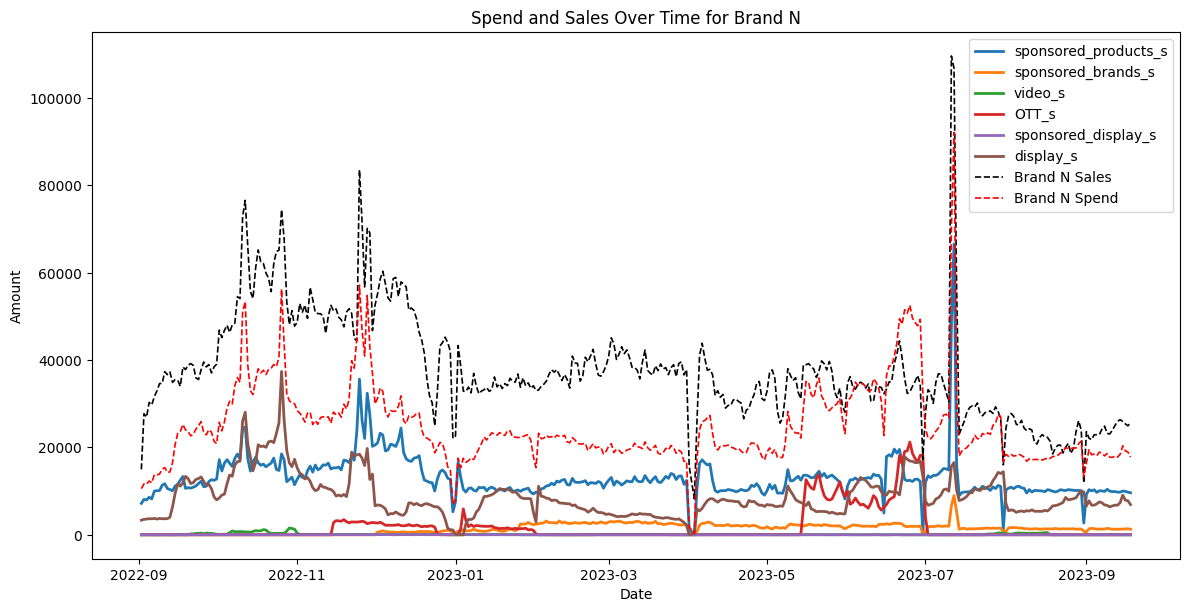

In [39]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_n_data = media_sales[media_sales['brand'] == 'Brand N']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_n_data['dates'].to_numpy(), brand_n_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_n_data['dates'].to_numpy(), brand_n_data['sales'].to_numpy(), label='Brand N Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_n_data['dates'].to_numpy(), brand_n_data['total_cost'].to_numpy(), label='Brand N Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand N')
plt.show()

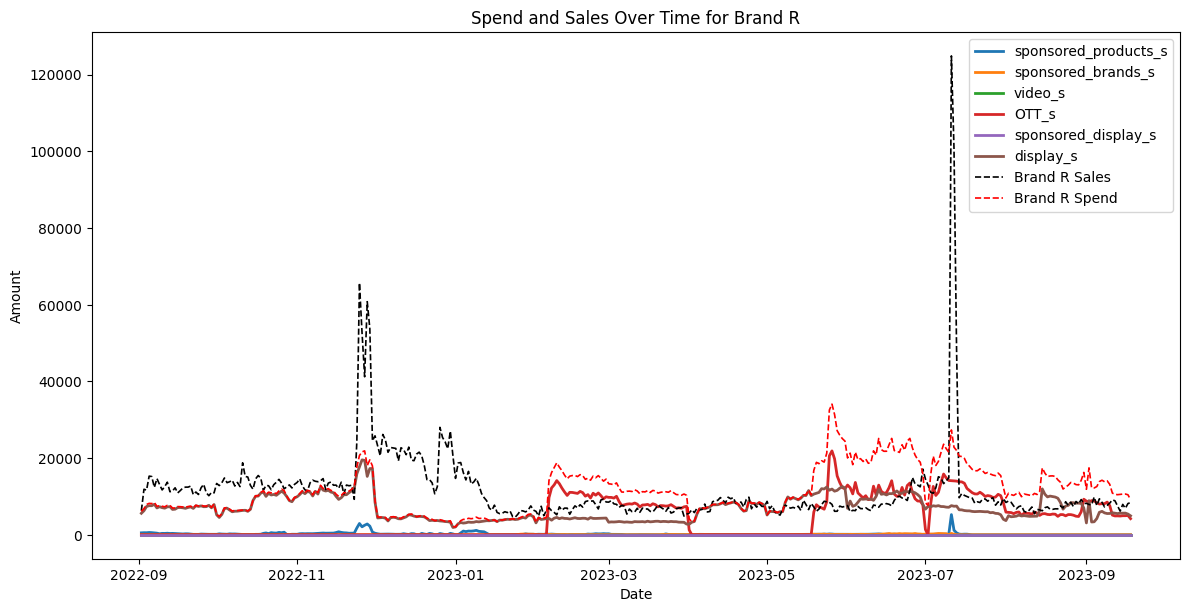

In [40]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_r_data = media_sales[media_sales['brand'] == 'Brand R']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_r_data['dates'].to_numpy(), brand_r_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_r_data['dates'].to_numpy(), brand_r_data['sales'].to_numpy(), label='Brand R Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_r_data['dates'].to_numpy(), brand_r_data['total_cost'].to_numpy(), label='Brand R Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand R')
plt.show()

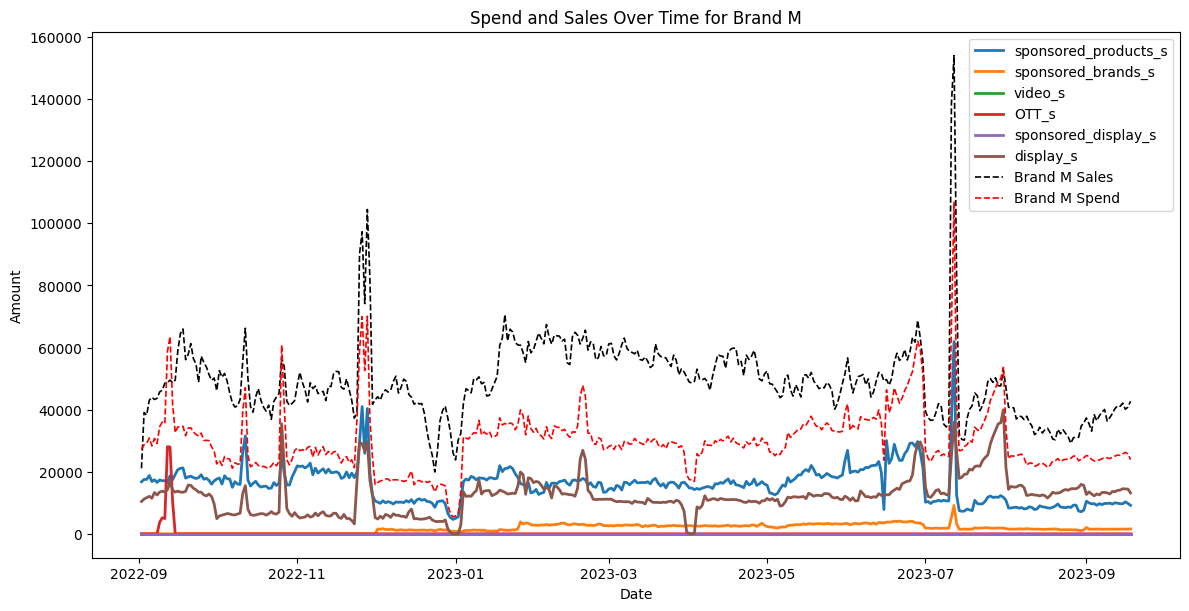

In [41]:
media_sales['dates'] = pd.to_datetime(media_sales['dates'])

brand_m_data = media_sales[media_sales['brand'] == 'Brand M']

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, channel in enumerate(channels):
    ax1.plot(brand_m_data['dates'].to_numpy(), brand_m_data[channel].to_numpy(), label=f'{channel}', linestyle='-', linewidth=2, color=f'C{i}')

ax1.plot(brand_m_data['dates'].to_numpy(), brand_m_data['sales'].to_numpy(), label='Brand M Sales', linestyle='--', color='black', linewidth=1.2)
ax1.plot(brand_m_data['dates'].to_numpy(), brand_m_data['total_cost'].to_numpy(), label='Brand M Spend', linestyle='--', color='red', linewidth=1.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Amount', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')

fig.tight_layout()
plt.title('Spend and Sales Over Time for Brand M')
plt.show()

In [125]:
# media_sales['dates'] = pd.to_datetime(media_sales['dates'])

# brand_c_data = media_sales[media_sales['brand'] == 'Brand C']

# plt.figure(figsize=(12, 6))

# total sales for Brand C
# plt.plot(brand_c_data['dates'].to_numpy(), brand_c_data['sales'].to_numpy(), label='Brand C Sales', linestyle='--')
# print(brand_c_data['sales'])

# spend for each channel with different colors
# for i, channel in enumerate(channels):
#     plt.plot(brand_c_data['dates'].to_numpy(), brand_c_data[channel].to_numpy(), label=f'{channel}', linestyle='-', marker='o', color=f'C{i}')
#     print(brand_c_data[channel])
# plt.title('Spend and Sales Over Time for Brand C')
# plt.xlabel('Date')
# plt.ylabel('Amount')
# plt.legend()
# plt.grid(True)
# plt.show()

### ROI calculation

In [37]:
total_sales = media_sales['sales'].sum()
total_cost = media_sales['total_cost'].sum()

# Calculate overall ROI
overall_roi = ((total_sales - total_cost) / total_cost) * 100

# Calculate individual ROIs for each brand
brands = media_sales['brand'].unique()
brand_roi_dict = {}

for brand in brands:
    brand_data = media_sales[media_sales['brand'] == brand]
    brand_total_sales = brand_data['sales'].sum()
    brand_total_cost = brand_data['total_cost'].sum()
    brand_roi = ((brand_total_sales - brand_total_cost) / brand_total_cost) * 100
    brand_roi_dict[brand] = brand_roi

print(f"Overall ROI: {overall_roi:.2f}%")
print("Individual Brand ROIs:")
for brand, roi in brand_roi_dict.items():
    print(f"{brand}: {roi:.2f}%")

Overall ROI: 60.67%
Individual Brand ROIs:
Brand C: -45.19%
Brand G: 63.99%
Brand LA: -61.43%
Brand LO: 130.44%
Brand M: 64.28%
Brand N: 51.36%
Brand R: 1.22%


# Simple Regression Models 

In [44]:
import statsmodels.api as sm

### sales on spend of different channels

In [42]:
channels_spend = ['sponsored_products_s',  'sponsored_brands_s', 
            'video_s', 'OTT_s', 'sponsored_display_s', 'display_s']
channels_user = ['sponsored_products_u', 'sponsored_brands_u',
            'video_u', 'OTT_u', 'sponsored_display_u', 'display_u']

In [46]:
X = sm.add_constant(media_sales[channels_spend])
y = media_sales['sales']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     3879.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:50:35   Log-Likelihood:                -30205.
No. Observations:                2673   AIC:                         6.042e+04
Df Residuals:                    2666   BIC:                         6.047e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5838.9513 

In [47]:
X = sm.add_constant(media_sales[channels_user])
y = media_sales['sales']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2979.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:51:34   Log-Likelihood:                -30517.
No. Observations:                2673   AIC:                         6.105e+04
Df Residuals:                    2666   BIC:                         6.109e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9439.3368 

In [52]:
sales_spend = []

for channel in channels_user:
    X = sm.add_constant(media_sales[channels_user]) 
    y = media_sales['sales']

    model = sm.OLS(y, X).fit()

    sales_spend.append({
        'Channel': channel,
        'R-squared': model.rsquared,
        'Intercept': model.params['const'],
        'Coefficient': model.params[channel],
        'P-value': model.pvalues[channel]
    })

sales_spend = pd.DataFrame(sales_spend)

sales_spend

,Channel,R-squared,Intercept,Coefficient,P-value
0,sponsored_products_u,0.8702,-9439.336775,2.098482,3.897456e-94
1,sponsored_brands_u,0.8702,-9439.336775,1.995955,0.000000e+00
2,video_u,0.8702,-9439.336775,-0.005274,4.773761e-02
3,OTT_u,0.8702,-9439.336775,0.029072,8.676794e-41
4,sponsored_display_u,0.8702,-9439.336775,-171.723040,3.273204e-03
5,display_u,0.8702,-9439.336775,0.016054,3.607687e-237


### Regress sales on user reach of different channels

In [ ]:
sales_spend = []

for channel in channels:
    X = sm.add_constant(media_sales[channel]) 
    y = media_sales['sales']

    model = sm.OLS(y, X).fit()

    sales_spend.append({
        'Channel': channel,
        'R-squared': model.rsquared,
        'Intercept': model.params['const'],
        'Coefficient': model.params[channel],
        'P-value': model.pvalues[channel]
    })

sales_spend = pd.DataFrame(sales_spend)

sales_spend

### Regress sales on user reach for all brands and Individual brands separately

In [78]:
all_brands_data = media_sales[['sales', 'total_users_reached']]
all_brands_data = sm.add_constant(all_brands_data)
all_model = sm.OLS(all_brands_data['sales'], all_brands_data[['const', 'total_users_reached']]).fit()
all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2128.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:58:39   Log-Likelihood:                -32463.
No. Observations:                2673   AIC:                         6.493e+04
Df Residuals:                    2671   BIC:                         6.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1361.3626   1362.331     -0.999      0.318   -4032.693    1309.968
total_users_reached     0.0298      0.001     46.131      0.000       0.029       0.031
==============================================================================
Omnibus:                     1273.469   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13801.237
Skew:                           1.982   Prob(JB):                         0.00
Kurtosis:                      13.402   Cond. No.                     3.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
brands = media_sales['brand'].unique()

results_list = []

all_brands_data = media_sales[['sales', 'total_users_reached']]
all_brands_data = sm.add_constant(all_brands_data)
all_model = sm.OLS(all_brands_data['sales'], all_brands_data[['const', 'total_users_reached']]).fit()

results_list.append({
    'Brand': 'All Brands',
    'R-squared': all_model.rsquared,
    'Intercept': all_model.params['const'],
    'User_Reach_Coefficient': all_model.params['total_users_reached'],
    'P-value': all_model.pvalues['total_users_reached']
})

for brand in brands:
    brand_data = media_sales[media_sales['brand'] == brand][['sales', 'total_users_reached']]
    brand_data = sm.add_constant(brand_data)
    brand_model = sm.OLS(brand_data['sales'], brand_data[['const', 'total_users_reached']]).fit()

    results_list.append({
        'Brand': brand,
        'R-squared': brand_model.rsquared,
        'Intercept': brand_model.params['const'],
        'User_Reach_Coefficient': brand_model.params['total_users_reached'],
        'P-value': brand_model.pvalues['total_users_reached']
    })

results_df = pd.DataFrame(results_list)

print(results_df)

        Brand  R-squared      Intercept  User_Reach_Coefficient       P-value
0  All Brands   0.443433   -1361.362569                0.029833  0.000000e+00
1     Brand C   0.098426    9883.031394                0.002576  3.594449e-10
2     Brand G   0.110013   22441.144541                0.005264  2.918915e-11
3    Brand LA   0.157731    3698.202682                0.002381  6.959595e-16
4    Brand LO   0.000552  183117.561684               -0.000686  6.471265e-01
5     Brand M   0.124745   39474.213706                0.006169  1.152581e-12
6     Brand N   0.317301   25677.753212                0.008419  2.790315e-33
7     Brand R   0.052882    7343.187624                0.005056  5.604345e-06
